In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
columns = read_json('../orderdListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# 儲存路徑

In [140]:
SAVE_NAME = 'trainValidSplt_maxabsnorm_1e-3'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

# Load data

## Train valid split

In [141]:
train_label = pd.read_csv('./csv/trainMatrix.csv')
train_label = train_label.set_index('id')
train_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt9604418,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tt9648786,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tt9382590,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tt9504436,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tt9848240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt8236848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
tt7866714,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
tt8364418,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [142]:
val_label = pd.read_csv('./csv/validMatrix.csv')
val_label = val_label.set_index('id')
val_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt5611432,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
tt6870808,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
tt7961060,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
tt7978752,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
tt2396489,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9740064,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt9747894,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt9799044,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label = test_label.set_index('filename')
test_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
train_data = pd.read_csv('./csv/computed_maxabsnorm_2018.csv')
train_data = train_data.set_index('Movie')
train_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,...,D_avg_norm,D_std_norm,A_avg_maxabsnorm,A_std_maxabsnorm,B_avg_maxabsnorm,B_std_maxabsnorm,C_avg_maxabsnorm,C_std_maxabsnorm,D_avg_maxabsnorm,D_std_maxabsnorm
Movie,,,,,,,,,,,,,,,,,,,,,
tt0328810,74.324324,77.632556,7.429596e+06,6.754840e+06,0.336424,0.335943,8309.913009,4659.362101,0.007298,0.023854,...,0.533451,0.483734,0.010480,0.023854,0.006342,0.000935,0.445638,0.832754,0.540165,0.483734
tt10005184,128.111111,168.813141,1.056263e+06,2.578889e+06,0.099732,0.170803,5180.699115,2028.150559,0.014906,0.051871,...,0.327074,0.210562,0.018064,0.051871,0.000902,0.000357,0.132108,0.423395,0.336758,0.210562
tt10017502,31.970588,14.597512,3.220428e+06,6.070315e+06,0.268349,0.325218,3663.755048,2106.268326,0.001307,0.004485,...,0.227029,0.218672,0.004508,0.004485,0.002749,0.000840,0.355463,0.806169,0.238153,0.218672
tt10043732,41.670732,28.350616,5.971663e+06,1.710160e+07,0.315923,0.330436,4184.885640,3340.768941,0.002679,0.008711,...,0.261399,0.346838,0.005876,0.008711,0.005097,0.002367,0.418481,0.819104,0.272028,0.346838
tt10048096,28.480000,27.728859,1.167823e+07,2.226350e+07,0.296425,0.314294,4229.213104,2424.473662,0.000813,0.008520,...,0.264322,0.251708,0.004016,0.008520,0.009969,0.003081,0.392654,0.779089,0.274909,0.251708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,140.034483,81.652114,1.034090e+06,2.018781e+06,0.115961,0.170274,5452.573097,3761.139541,0.016593,0.025089,...,0.345005,0.390481,0.019745,0.025089,0.000883,0.000279,0.153606,0.422083,0.354431,0.390481
tt9879080,83.636364,51.821850,1.771188e+06,2.408702e+06,0.058649,0.080815,1852.817936,1417.178866,0.008615,0.015923,...,0.107595,0.147131,0.011793,0.015923,0.001512,0.000333,0.077689,0.200329,0.120438,0.147131
tt9891764,32.716981,19.979119,7.569638e+06,1.308621e+07,0.243142,0.287351,4391.310240,2942.670602,0.001412,0.006139,...,0.275013,0.305507,0.004613,0.006139,0.006461,0.001811,0.322074,0.712302,0.285446,0.305507


In [ ]:
# train_data["C_avg_norm"] = train_data["C_avg_norm"]*0.1
# train_data["C_std_norm"] = train_data["C_std_norm"]*0.1
# train_data["D_avg_norm"] = train_data["D_avg_norm"]*0.1
# train_data["D_std_norm"] = train_data["D_std_norm"]*0.1
# train_data

In [145]:
test_data = pd.read_csv('./csv/computed_maxabsnorm_2019.csv')
test_data = test_data.set_index('Movie')
test_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,...,D_avg_norm,D_std_norm,A_avg_maxabsnorm,A_std_maxabsnorm,B_avg_maxabsnorm,B_std_maxabsnorm,C_avg_maxabsnorm,C_std_maxabsnorm,D_avg_maxabsnorm,D_std_maxabsnorm
Movie,,,,,,,,,,,,,,,,,,,,,
47metersdown,34.804878,23.842184,1.191448e+07,3.059149e+07,0.245187,0.249696,3839.297159,3297.384679,0.071101,0.066649,...,0.379584,0.835915,0.255577,0.131355,0.032209,0.040722,0.569560,0.654742,0.486451,0.887704
adogsjourneymovie,34.632479,29.109753,2.695759e+06,4.626123e+06,0.335291,0.348500,3266.022091,2096.407257,0.069522,0.097831,...,0.291833,0.363484,0.254311,0.160376,0.007288,0.006158,0.778867,0.913822,0.413816,0.564384
aftermathmovie,35.692308,26.611911,7.428488e+05,1.455065e+06,0.204024,0.259721,3211.875123,2616.735866,0.079233,0.083045,...,0.283545,0.568167,0.262093,0.146614,0.002008,0.001937,0.473940,0.681031,0.406955,0.704464
aftermovie,58.276596,54.904056,5.679151e+06,1.419376e+07,0.212422,0.231199,3176.910267,2106.883693,0.286168,0.250527,...,0.278193,0.367605,0.427932,0.302486,0.015353,0.018894,0.493447,0.606241,0.402525,0.567204
alitamovie,35.784314,29.192272,2.569164e+06,6.429860e+06,0.266729,0.269028,2843.780762,2350.997308,0.080076,0.098320,...,0.227201,0.463632,0.262769,0.160830,0.006945,0.008559,0.619600,0.705434,0.360316,0.632923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,43.010204,52.851833,2.260180e+06,6.481499e+06,0.175488,0.220206,3454.562570,3247.741628,0.146285,0.238378,...,0.320693,0.816387,0.315829,0.291179,0.006110,0.008628,0.407651,0.577416,0.437704,0.874340
whatmenwant,32.086957,19.626320,2.003662e+07,5.276056e+07,0.241500,0.260970,6006.485656,2582.258884,0.046198,0.041692,...,0.711315,0.554604,0.235619,0.108128,0.054165,0.070232,0.560995,0.684306,0.761041,0.695182
wonderparkmovie,27.282443,13.193380,1.571109e+08,4.445462e+08,0.430486,0.331031,5563.594289,2771.415032,0.002175,0.003610,...,0.643522,0.629013,0.200338,0.072687,0.424721,0.591759,1.000000,0.868017,0.704926,0.746106


In [ ]:
# test_data["C_avg_norm"] = test_data["C_avg_norm"]*0.1
# test_data["C_std_norm"] = test_data["C_std_norm"]*0.1
# test_data["D_avg_norm"] = test_data["D_avg_norm"]*0.1
# test_data["D_std_norm"] = test_data["D_std_norm"]*0.1
# test_data

In [146]:
val_data = train_data.loc[val_label.index, :]
train_data = train_data.drop(val_label.index)
print(train_data.shape, val_data.shape, test_data.shape)
print(train_label.shape, val_label.shape, test_label.shape)

(972, 24) (433, 24) (97, 24)
(972, 20) (433, 20) (97, 20)


In [147]:
train_x = train_data.iloc[:, 16:].to_numpy()
val_x = val_data.iloc[:, 16:].to_numpy()
test_x = test_data.iloc[:, 16:].to_numpy()

train_y = train_label.to_numpy()
val_y = val_label.to_numpy()
test_y = test_label.to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(972, 8) (972, 20)
(433, 8) (433, 20)
(97, 8) (97, 20)


## Random split valid

In [88]:
train_data = pd.read_csv('./csv/computed_robnorm_2018.csv')
train_data = train_data.set_index('Movie')
train_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,...,D_avg_norm,D_std_norm,A_avg_robnorm,A_std_robnorm,B_avg_robnorm,B_std_robnorm,C_avg_robnorm,C_std_robnorm,D_avg_robnorm,D_std_robnorm
Movie,,,,,,,,,,,,,,,,,,,,,
tt0328810,74.324324,77.632556,7.429596e+06,6.754840e+06,0.336424,0.335943,8309.913009,4659.362101,0.007298,0.023854,...,0.533451,0.483734,0.789992,0.873213,0.124514,-0.096821,0.586752,0.825826,1.721636,2.016575
tt10005184,128.111111,168.813141,1.056263e+06,2.578889e+06,0.099732,0.170803,5180.699115,2028.150559,0.014906,0.051871,...,0.327074,0.210562,2.374429,3.124765,-0.188255,-0.184490,-1.107838,-1.135527,0.453564,-0.609521
tt10017502,31.970588,14.597512,3.220428e+06,6.070315e+06,0.268349,0.325218,3663.755048,2106.268326,0.001307,0.004485,...,0.227029,0.218672,-0.457652,-0.683333,-0.082050,-0.111192,0.099370,0.698447,-0.161158,-0.531555
tt10043732,41.670732,28.350616,5.971663e+06,1.710160e+07,0.315923,0.330436,4184.885640,3340.768941,0.002679,0.008711,...,0.261399,0.346838,-0.171908,-0.343723,0.052966,0.120398,0.439974,0.760422,0.050023,0.700546
tt10048096,28.480000,27.728859,1.167823e+07,2.226350e+07,0.296425,0.314294,4229.213104,2424.473662,0.000813,0.008520,...,0.264322,0.251708,-0.560477,-0.359076,0.333014,0.228767,0.300380,0.568700,0.067987,-0.213968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,140.034483,81.652114,1.034090e+06,2.018781e+06,0.115961,0.170274,5452.573097,3761.139541,0.016593,0.025089,...,0.345005,0.390481,2.725664,0.972469,-0.189344,-0.196249,-0.991645,-1.141811,0.563737,1.120099
tt9879080,83.636364,51.821850,1.771188e+06,2.408702e+06,0.058649,0.080815,1852.817936,1417.178866,0.008615,0.015923,...,0.107595,0.147131,1.064304,0.235860,-0.153171,-0.188063,-1.401967,-2.204299,-0.895016,-1.219304
tt9891764,32.716981,19.979119,7.569638e+06,1.308621e+07,0.243142,0.287351,4391.310240,2942.670602,0.001412,0.006139,...,0.275013,0.305507,-0.435665,-0.550443,0.131386,0.036099,-0.081096,0.248707,0.133674,0.303222


In [ ]:
# train_data["C_avg_norm"] = train_data["C_avg_norm"]*0.1
# train_data["C_std_norm"] = train_data["C_std_norm"]*0.1
# train_data["D_avg_norm"] = train_data["D_avg_norm"]*0.1
# train_data["D_std_norm"] = train_data["D_std_norm"]*0.1
# train_data

In [89]:
train_label = pd.read_csv('./csv/filename2genreMat_2018.csv')
train_label = train_label.set_index('id')
train_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt0328810,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
tt10005184,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt10017502,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
tt10043732,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt10048096,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
tt9879080,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tt9891764,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
test_data = pd.read_csv('./csv/computed_robnorm_2019.csv')
test_data = test_data.set_index('Movie')
test_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,...,D_avg_norm,D_std_norm,A_avg_robnorm,A_std_robnorm,B_avg_robnorm,B_std_robnorm,C_avg_robnorm,C_std_robnorm,D_avg_robnorm,D_std_robnorm
Movie,,,,,,,,,,,,,,,,,,,,,
47metersdown,34.804878,23.842184,1.191448e+07,3.059149e+07,0.245187,0.249696,3839.297159,3297.384679,0.071101,0.066649,...,0.379584,0.835915,-0.163256,-0.480021,0.879222,0.659690,0.042583,-0.359292,0.135136,1.258302
adogsjourneymovie,34.632479,29.109753,2.695759e+06,4.626123e+06,0.335291,0.348500,3266.022091,2096.407257,0.069522,0.097831,...,0.291833,0.363484,-0.180665,-0.229981,-0.215102,-0.370271,1.083217,1.531517,-0.223827,-0.420333
aftermathmovie,35.692308,26.611911,7.428488e+05,1.455065e+06,0.204024,0.259721,3211.875123,2616.735866,0.079233,0.083045,...,0.283545,0.568167,-0.073642,-0.348548,-0.446926,-0.496056,-0.432822,-0.167436,-0.257732,0.306943
aftermovie,58.276596,54.904056,5.679151e+06,1.419376e+07,0.212422,0.231199,3176.910267,2106.883693,0.286168,0.250527,...,0.278193,0.367605,2.206959,0.994421,0.139047,0.009246,-0.335836,-0.713263,-0.279625,-0.405690
alitamovie,35.784314,29.192272,2.569164e+06,6.429860e+06,0.266729,0.269028,2843.780762,2350.997308,0.080076,0.098320,...,0.227201,0.463632,-0.064351,-0.226064,-0.230130,-0.298722,0.291371,0.010662,-0.488218,-0.064486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,43.010204,52.851833,2.260180e+06,6.481499e+06,0.175488,0.220206,3454.562570,3247.741628,0.146285,0.238378,...,0.320693,0.816387,0.665332,0.897006,-0.266808,-0.296674,-0.762395,-0.923635,-0.105770,1.188915
whatmenwant,32.086957,19.626320,2.003662e+07,5.276056e+07,0.241500,0.260970,6006.485656,2582.258884,0.046198,0.041692,...,0.711315,0.554604,-0.437717,-0.680140,1.843375,1.539065,0.000000,-0.143533,1.492145,0.258753
wonderparkmovie,27.282443,13.193380,1.571109e+08,4.445462e+08,0.430486,0.331031,5563.594289,2771.415032,0.002175,0.003610,...,0.643522,0.629013,-0.922885,-0.985498,18.115010,17.079916,2.182645,1.197221,1.214824,0.523142


In [ ]:
# test_data["C_avg_norm"] = test_data["C_avg_norm"]*0.1
# test_data["C_std_norm"] = test_data["C_std_norm"]*0.1
# test_data["D_avg_norm"] = test_data["D_avg_norm"]*0.1
# test_data["D_std_norm"] = test_data["D_std_norm"]*0.1
# test_data

In [91]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label = test_label.set_index('filename')
test_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
print(train_data.shape,test_data.shape)
print(train_label.shape,test_label.shape)
# print(train_data.isnull().sum())
# print(test_data.isnull().sum())

(1405, 24) (97, 24)
(1405, 20) (97, 20)


In [93]:
val_data = train_data.sample(frac = 0.2,random_state = 42)
train_data = train_data.drop(val_data.index)
print(train_data.shape, val_data.shape)

(1124, 24) (281, 24)


In [94]:
val_label = train_label.loc[val_data.index, :]
train_label = train_label.drop(val_data.index)
print(train_label.shape, val_label.shape)

(1124, 20) (281, 20)


In [95]:
train_x = train_data.iloc[:, 16:].to_numpy()
val_x = val_data.iloc[:, 16:].to_numpy()
test_x = test_data.iloc[:, 16:].to_numpy()

train_y = train_label.to_numpy()
val_y = val_label.to_numpy()
test_y = test_label.to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(1124, 8) (1124, 20)
(281, 8) (281, 20)
(97, 8) (97, 20)


# Model start

In [148]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (8, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))

In [149]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                660       
Total params: 12,148
Trainable params: 12,148
Non-trainable params: 0
_________________________________________________________________


In [150]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss')]

history = model.fit(train_x, train_y, 
                    batch_size=32, epochs=100, verbose=1, 
                    validation_data=(val_x, val_y), 
                    callbacks=callbacks)

Train on 972 samples, validate on 433 samples
Epoch 1/100
972/972 [==============================] - 0s 446us/step - loss: 0.6432 - acc: 0.7282 - val_loss: 0.5238 - val_acc: 0.8726
Epoch 2/100
972/972 [==============================] - 0s 60us/step - loss: 0.4267 - acc: 0.8629 - val_loss: 0.2924 - val_acc: 0.9066
Epoch 3/100
972/972 [==============================] - 0s 60us/step - loss: 0.3522 - acc: 0.8847 - val_loss: 0.2837 - val_acc: 0.9066
Epoch 4/100
972/972 [==============================] - 0s 60us/step - loss: 0.3433 - acc: 0.8847 - val_loss: 0.2845 - val_acc: 0.9066


In [151]:
# save model weights
model.save(WEIGHTS_SAVE)

In [152]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

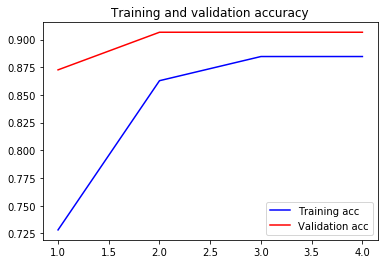

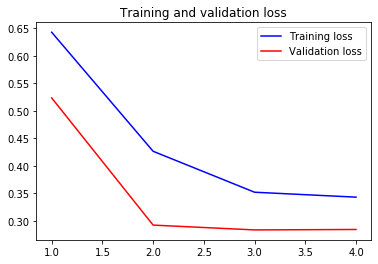

In [153]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing

In [154]:
pred = model.predict(test_x, verbose = 1)

97/97 [==============================] - 0s 874us/step


In [155]:
pred.shape

(97, 20)

In [156]:
results=pd.DataFrame(pred, columns=columns)
results["username"] = test_data.index
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

In [157]:
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.052648,0.043293,0.037457,0.038541,0.089877,0.043335,0.035347,0.453056,0.038852,...,0.035473,0.034934,0.025405,0.040350,0.038701,0.032833,0.037961,0.037711,0.034833,0.035998
1,adogsjourneymovie,0.050344,0.039896,0.035851,0.035956,0.081216,0.039605,0.033235,0.458416,0.038306,...,0.032559,0.033557,0.023580,0.039016,0.034743,0.032308,0.033575,0.037502,0.034488,0.035185
2,aftermathmovie,0.065481,0.054586,0.048470,0.049399,0.103622,0.053788,0.045514,0.456675,0.050340,...,0.045817,0.046011,0.033687,0.051869,0.049219,0.043555,0.047843,0.049303,0.045785,0.046535
3,aftermovie,0.068539,0.057063,0.051853,0.050995,0.105500,0.056114,0.048175,0.459056,0.053121,...,0.047146,0.048990,0.035539,0.054139,0.050847,0.046492,0.048818,0.052907,0.049527,0.049141
4,alitamovie,0.063421,0.052443,0.047059,0.047306,0.100258,0.052439,0.044001,0.459365,0.049218,...,0.043590,0.044328,0.032512,0.050440,0.046774,0.042372,0.045516,0.048400,0.044828,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.059063,0.050080,0.042977,0.044306,0.097879,0.049455,0.040569,0.453273,0.044260,...,0.041269,0.041253,0.029837,0.046010,0.044978,0.038504,0.044346,0.043803,0.040238,0.040906
93,whatmenwant,0.053727,0.042866,0.037726,0.038167,0.088919,0.040525,0.035531,0.449360,0.038365,...,0.034950,0.034942,0.024446,0.039662,0.037985,0.032069,0.036242,0.036564,0.034993,0.036266
94,wonderparkmovie,0.033223,0.025815,0.022772,0.021738,0.062768,0.025121,0.019740,0.455556,0.023076,...,0.020168,0.019646,0.013378,0.022948,0.022613,0.016991,0.021562,0.020816,0.020399,0.021231
95,xmenmovies,0.056336,0.045858,0.041306,0.041011,0.091145,0.046341,0.038364,0.459926,0.043343,...,0.037451,0.038384,0.027864,0.044220,0.040378,0.036824,0.039169,0.042638,0.039441,0.039913


## Label top n dynamic

In [158]:
true_df = test_label
true_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results = results.set_index('username')
results

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
username,,,,,,,,,,,,,,,,,,,,
47metersdown,0.052648,0.043293,0.037457,0.038541,0.089877,0.043335,0.035347,0.453056,0.038852,0.032196,0.035473,0.034934,0.025405,0.040350,0.038701,0.032833,0.037961,0.037711,0.034833,0.035998
adogsjourneymovie,0.050344,0.039896,0.035851,0.035956,0.081216,0.039605,0.033235,0.458416,0.038306,0.031027,0.032559,0.033557,0.023580,0.039016,0.034743,0.032308,0.033575,0.037502,0.034488,0.035185
aftermathmovie,0.065481,0.054586,0.048470,0.049399,0.103622,0.053788,0.045514,0.456675,0.050340,0.042521,0.045817,0.046011,0.033687,0.051869,0.049219,0.043555,0.047843,0.049303,0.045785,0.046535
aftermovie,0.068539,0.057063,0.051853,0.050995,0.105500,0.056114,0.048175,0.459056,0.053121,0.044438,0.047146,0.048990,0.035539,0.054139,0.050847,0.046492,0.048818,0.052907,0.049527,0.049141
alitamovie,0.063421,0.052443,0.047059,0.047306,0.100258,0.052439,0.044001,0.459365,0.049218,0.040892,0.043590,0.044328,0.032512,0.050440,0.046774,0.042372,0.045516,0.048400,0.044828,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,0.059063,0.050080,0.042977,0.044306,0.097879,0.049455,0.040569,0.453273,0.044260,0.037114,0.041269,0.041253,0.029837,0.046010,0.044978,0.038504,0.044346,0.043803,0.040238,0.040906
whatmenwant,0.053727,0.042866,0.037726,0.038167,0.088919,0.040525,0.035531,0.449360,0.038365,0.032332,0.034950,0.034942,0.024446,0.039662,0.037985,0.032069,0.036242,0.036564,0.034993,0.036266
wonderparkmovie,0.033223,0.025815,0.022772,0.021738,0.062768,0.025121,0.019740,0.455556,0.023076,0.017525,0.020168,0.019646,0.013378,0.022948,0.022613,0.016991,0.021562,0.020816,0.020399,0.021231


In [160]:
labels = read_json('../genresDic.json')

In [161]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [162]:
li = []
for i, row in true_df.iterrows():
    username = i.split('.')[0]
#     if username == results.loc[i,:]['username']: # username equals
    print(i, username)
    truth = labels[username]
    numTrue = sum(row)
    print('count:', numTrue)

    s = results.loc[username,:]
    top_n = s.sort_values(ascending=False)[:numTrue]
    inList = list(top_n.index)

    onehot = []
    for g in columns:
        onehot.append(int(g in inList))

    acc = countAcc(inList, truth)
    print(acc, inList, truth)

    appList = [username, acc, truth, inList] + onehot
    li.append(appList)
        

47metersdown.mp4 47metersdown
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Drama', 'Horror']
adogsjourneymovie.mp4 adogsjourneymovie
count: 3
0.6666666666666666 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Comedy', 'Drama']
aftermathmovie.mp4 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Drama', 'Romance', 'War']
aftermovie.mp4 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
alitamovie.mp4 alitamovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Action', 'Adventure', 'Sci-Fi']
angelhasfallen.mp4 angelhasfallen
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
angrybirdsmovie.mp4 angrybirdsmovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Animation', 'Comedy']
annabellemovie.mp4 annabellemovie
count: 3
0.0 ['Drama', 'Comedy', 'Action'] ['Horror', 'Mystery', 'Thriller']
annamovie.mp4 annamovie
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
apollo11movie.mp4 

In [163]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie,0.333333,"[Drama, Romance, War]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,aftermovie,0.500000,"[Drama, Romance]","[Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,alitamovie,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.000000,"[Horror, Mystery, Thriller]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
93,whatmenwant,0.333333,"[Comedy, Fantasy, Romance]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,wonderparkmovie,0.333333,"[Adventure, Animation, Comedy]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [165]:
acc_df['acc'].mean()

0.3917525773195877